In [1]:
%matplotlib notebook
%config InlineBackend.figure_format ='svg'
from ipywidgets import Layout, widgets
from IPython.display import clear_output, display
import Fumagalli_Motta_Tarantino_2020 as FMT20


def create_float_input(
    value: float, description: str, min_value=0.0, max_value=1.0, step=0.01
) -> widgets.BoundedFloatText:
    return widgets.BoundedFloatText(
        value=value,
        min=min_value,
        max=max_value,
        step=step,
        description=description,
        disabled=False,
    )


def get_merger_policy(policy: str) -> FMT20.MergerPolicies:
    if policy == "Strict":
        return FMT20.MergerPolicies.Strict
    if policy == "Intermediate (more lenient than strict)":
        return FMT20.MergerPolicies.Intermediate_late_takeover_prohibited
    if policy == "Intermediate (stricter than laissez-faire)":
        return FMT20.MergerPolicies.Intermediate_late_takeover_allowed
    return FMT20.MergerPolicies.Laissez_faire


plot_kwargs = {
    "figure_title": "",
    "thresholds": True,
    "optimal_policy": True,
    "y_offset": -35,
    "fontsize": 9,
    "parameter_number": 4,
}

model = widgets.Dropdown(
    options=[
        FMT20.NotebookUtilities.get_model_label(FMT20.OptimalMergerPolicy),
        FMT20.NotebookUtilities.get_model_label(FMT20.ProCompetitive),
        FMT20.NotebookUtilities.get_model_label(FMT20.ResourceWaste),
        FMT20.NotebookUtilities.get_model_label(FMT20.PerfectInformation),
    ],
)

merger_policy = widgets.Dropdown(
    options=[
        FMT20.MergerPolicies.Strict,
        FMT20.MergerPolicies.Intermediate_late_takeover_prohibited,
        FMT20.MergerPolicies.Intermediate_late_takeover_allowed,
        FMT20.MergerPolicies.Laissez_faire,
    ],
)
development_costs = create_float_input(0.1, "$K$")
startup_assets = create_float_input(0.05, "$A$")
success_probability = create_float_input(0.7, "$p$")
private_benefit = create_float_input(0.05, "$B$")
consumer_surplus_without_innovation = create_float_input(0.2, "$CS^m$")
incumbent_profit_without_innovation = create_float_input(0.4, "$\\pi^m_I$")
consumer_surplus_duopoly = create_float_input(0.5, "$CS^d$")
incumbent_profit_duopoly = create_float_input(0.2, "$\\pi^d_I$")
startup_profit_duopoly = create_float_input(0.2, "$\\pi^d_S$")
consumer_surplus_with_innovation = create_float_input(0.3, "$CS^M$")
incumbent_profit_with_innovation = create_float_input(0.5, "$\\pi^M_I$")
development_outcome = widgets.Checkbox(
    value=True, description="Attempted development successful?"
)

configurations = widgets.Dropdown(
    description="Configuration",
    options=FMT20.NotebookUtilities.get_configurations(),
)
button = widgets.Button(description="draw", layout=Layout(width="300px", height="auto"))

input_widgets = [
    development_outcome,
    development_costs,
    startup_assets,
    success_probability,
    private_benefit,
    consumer_surplus_without_innovation,
    incumbent_profit_without_innovation,
    consumer_surplus_duopoly,
    incumbent_profit_duopoly,
    startup_profit_duopoly,
    consumer_surplus_with_innovation,
    incumbent_profit_with_innovation,
    model,
    merger_policy,
    configurations,
    button,
]

grid = widgets.GridBox(
    input_widgets, layout=widgets.Layout(grid_template_columns="repeat(3, 310px)")
)


def set_configuration(e):
    config_list = configurations.value.split(" - ")
    config = FMT20.LoadParameters(config_id=int(config_list[0]))
    model.value = config_list[1]
    development_costs.value = config.params.get("development_costs")
    startup_assets.value = config.params.get("startup_assets")
    success_probability.value = config.params.get("success_probability")
    private_benefit.value = config.params.get("private_benefit")
    consumer_surplus_without_innovation.value = config.params.get(
        "consumer_surplus_without_innovation"
    )
    incumbent_profit_without_innovation.value = config.params.get(
        "incumbent_profit_without_innovation"
    )
    consumer_surplus_duopoly.value = config.params.get("consumer_surplus_duopoly")
    incumbent_profit_duopoly.value = config.params.get("incumbent_profit_duopoly")
    startup_profit_duopoly.value = config.params.get("startup_profit_duopoly")
    consumer_surplus_with_innovation.value = config.params.get(
        "consumer_surplus_with_innovation"
    )
    incumbent_profit_with_innovation.value = config.params.get(
        "incumbent_profit_with_innovation"
    )


def draw_figure(e):
    model_kwargs = {
        "merger_policy": merger_policy.value,
        "development_costs": development_costs.value,
        "startup_assets": startup_assets.value,
        "development_success": development_outcome.value,
        "success_probability": success_probability.value,
        "private_benefit": private_benefit.value,
        "consumer_surplus_without_innovation": consumer_surplus_without_innovation.value,
        "incumbent_profit_without_innovation": incumbent_profit_without_innovation.value,
        "consumer_surplus_duopoly": consumer_surplus_duopoly.value,
        "incumbent_profit_duopoly": incumbent_profit_duopoly.value,
        "startup_profit_duopoly": startup_profit_duopoly.value,
        "consumer_surplus_with_innovation": consumer_surplus_with_innovation.value,
        "incumbent_profit_with_innovation": incumbent_profit_with_innovation.value,
    }
    try:
        if model.value == FMT20.NotebookUtilities.get_model_label(
            FMT20.OptimalMergerPolicy
        ):
            model_type = FMT20.OptimalMergerPolicy
        elif model.value == FMT20.NotebookUtilities.get_model_label(
            FMT20.ProCompetitive
        ):
            model_type = FMT20.ProCompetitive
        elif model.value == FMT20.NotebookUtilities.get_model_label(
            FMT20.ResourceWaste
        ):
            model_type = FMT20.ResourceWaste
        elif model.value == FMT20.NotebookUtilities.get_model_label(
            FMT20.PerfectInformation
        ):
            model_type = FMT20.PerfectInformation
        else:
            raise NotImplementedError("No such model type available")
        clear_output()
        display(grid)
        fig, ax = FMT20.Overview(
            model_type(**model_kwargs), figsize=(9.5, 8), default_style=False
        ).plot(**plot_kwargs)
        fig.set_label("Interactive use of Fumagalli et al. (2020)")
    except AssertionError as e:
        print(e)


configurations.observe(set_configuration)
button.on_click(draw_figure)

GridBox(children=(Checkbox(value=True, description='Attempted development successful?'), BoundedFloatText(valu…

<IPython.core.display.Javascript object>


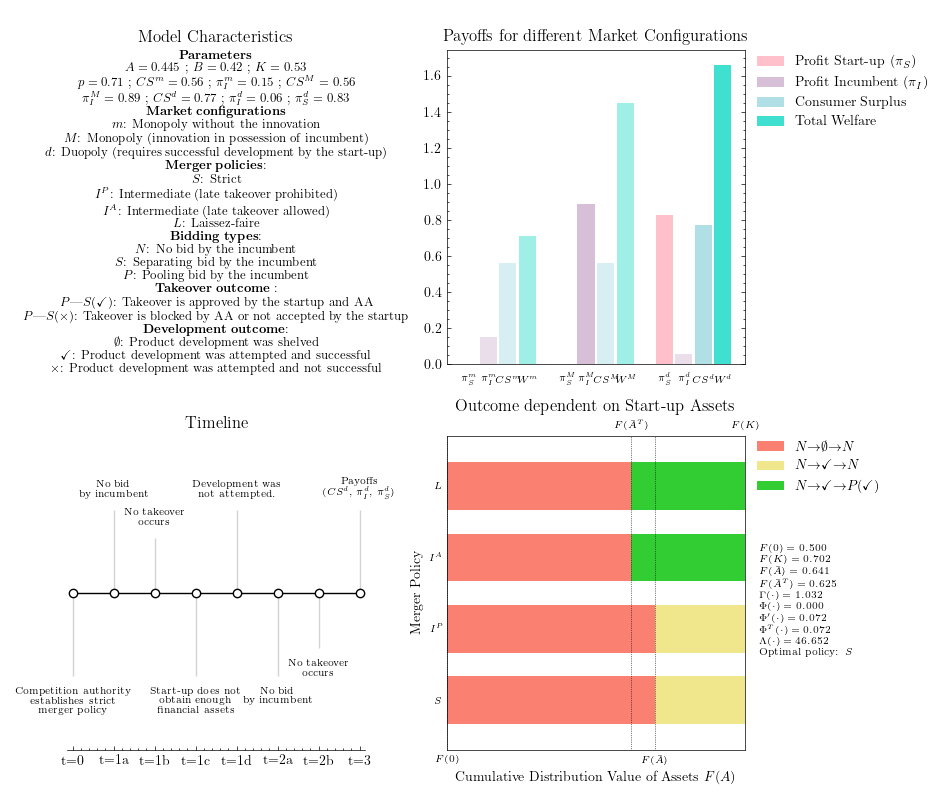

In [2]:
grid